In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ISLP import load_data


In [5]:
df = pd.read_csv('../data/paint.csv')
df.head()

,Relative humidity (%),type,Evaporation (% wt)
0,35.3,1,11.2
1,29.6,1,11.0
2,31.0,1,12.6
3,58.0,1,8.3
4,62.0,1,10.1


NameError: name 'ea_sq' is not defined

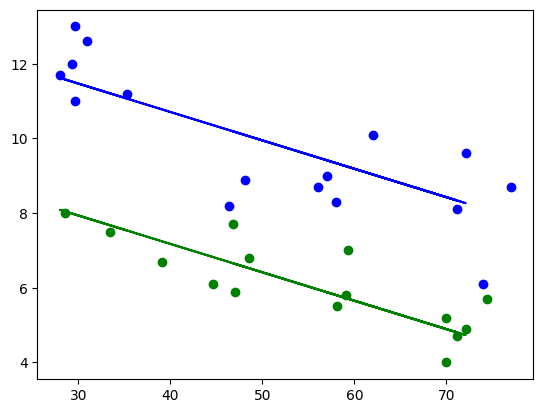

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = df.drop('Evaporation (% wt)', axis=1), df['Evaporation (% wt)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Discussion of the categorical variables 
# The categorical variables are 'Type'

b = model.coef_

modelA = np.append(model.intercept_ + b[1], b[0]) # The intercept is the first element of the array returned by model.coef_ and the second element is the coefficient of the first variable in the dataframe
modelB = np.append(model.intercept_, b[0])

modelA, modelB

Xr = X_test.drop('type', axis=1)

# insert the intercept
Xr.insert(0, 'Intercept', 1)
x = Xr['Relative humidity (%)'] # The variable that is being plotted on the x-axis

# Show whole data values with color coding for the type of paint
splitA = df[df['type'] == 1]
splitB = df[df['type'] == 0]

X_A = splitA['Relative humidity (%)'] # The variable that is being plotted on the x-axis
X_B = splitB['Relative humidity (%)'] # The variable that is being plotted on the x-axis
Y_A = splitA['Evaporation (% wt)'] # The variable that is being plotted on the y-axis
Y_B = splitB['Evaporation (% wt)'] # The variable that is being plotted on the y-axis
plt.scatter(X_A, Y_A, color='blue')
plt.scatter(X_B, Y_B, color='green')

# Plot the linear regression models

plt.plot(x, Xr @ modelA, color='b')
plt.plot(x, Xr @ modelB, color='g')
# Do linear klassification
def classify(x, y):
    row_x = [1.0, x]
    ea_sq = np.square(y - (row_x @ modelA))
    eb_sq = np.square(y - (row_x @ modelB))
    return ea_sq < eb_sq


Y = y_test
X = X_test['Relative humidity (%)']
T = X_test['type']
correct = True

for i, x in enumerate(X):
    if(T.iloc[i] != classify(x, Y.iloc[i])):
        plt.scatter(x, Y.iloc[i], c="red")
        row_x = [1.0, x]
        ea_sq = np.square(Y.iloc[i] - (row_x @ modelA))
        eb_sq = np.square(Y.iloc[i] - (row_x @ modelB))
print(f"Data row {X_test.iloc[i].name}, {classify(x, Y.iloc[i])} should be: {X_test.iloc[i][1]} , distances: {ea_sq, eb_sq}")
        

Text(0.5, 1.0, 'Logistic function')

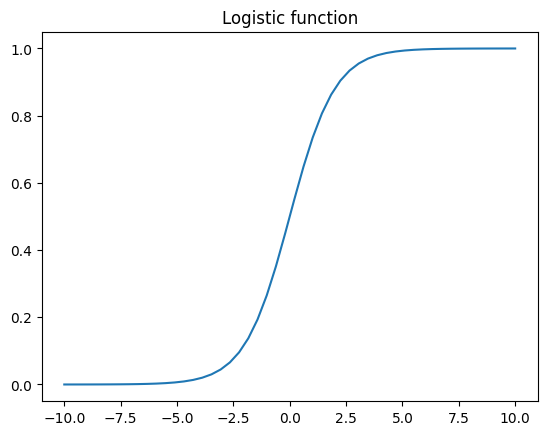

In [34]:
logistic_func = lambda x: np.exp(x) / (1 + np.exp(x))

# Plot the logistic function
x = np.linspace(-10, 10)
plt.plot(x, logistic_func(x))
plt.title('Logistic function')

In [ ]:
# A logistic function is a function that can take any input value and map it into a value between 0 and 1.
# This is useful for binary classification problems, where we want to classify an input into one of two categories.
# The logistic function is defined as the sigmoid function, which is a special case of the logistic function.
# The logistic function is defined as f(x) = 1 / (1 + e^-x), where e is the base of the natural logarithm.
# The logistic func uses Maximum Likelihood Estimation to estimate the parameters of the model.

In [42]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

# Note that our categorical data is our Y 
X, y = df.drop('type', axis=1), df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train) # We fit and transform the training data
scaled_X_test = scaler.transform(X_test) # We only transform the test data, not fit it

# Create a logistic regression model
log_reg = LogisticRegressionCV(penalty='elasticnet', l1_ratios=np.linspace(0, 1, 10), solver='saga', max_iter=10000)
log_reg.fit(scaled_X_train, y_train) # Fit the model to the training data

y_hat = log_reg.predict_proba(scaled_X_test) # Predict the test data

print(f"Probability of correct prediction:\n{(y_test - y_hat[:,0]).round(6).abs()}")

Probability of correct prediction:
27    0.558890
15    0.621741
23    0.744147
17    0.525649
8     0.613710
9     0.664105
29    0.764872
24    0.729546
12    0.823695
0     0.804066
Name: type, dtype: float64
